<h2>PCASP Failure Analysis - PECAN 2015</h2>

In [28]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import os
import glob
import awot
from awot.graph import create_basemap, FlightLevel, RadarHorizontalPlot
%matplotlib inline

import warnings; warnings.simplefilter('ignore', DeprecationWarning)

In [6]:
name_map = {
    # Aircraft Position
    'longitude': 'LONC',
    'latitude': 'LATC',
    'altitude': 'ztrue',
    'pressure_altitude': 'PALT',
    'tas': 'tas',
    'ias': 'aias',
    'true_heading': 'AVthead',
    'pitch': 'AVpitch',
    'roll_angle': 'AVroll',
    # Atmospheric State
    'pressure': 'pmb',
    'temperature': 'trf',
    'dewpoint_temperature': 'tdplicor',
    'thetad': 'thetad',
    'thetae': 'thetae',
    'relative_humidity': 'rh',
    'mixing_ratio': 'mr',
    'lwc': 'lwc100',
    'turb': 'turb',
    'g_accel': 'avnorma',
    # Radiometric
    'irtop': 'irtc',
    'irbottom': 'irbc',
    'swtop': 'swt',
    'swbottom': 'swb',
    'kt1585': 'KT_RAW',
    'kt1985': 'HEIMAN_RAW',
    'rstb1585': 'rstb2',
    'rstb1985': 'rstb',
    
    # Wind derivations
    'Uwind': 'avuwind',
    'Vwind': 'avvwind',
    'Wwind': 'avwwind',
    'longitudinal_wind': 'avux',
    'latitudinal_wind': 'avvy',
    'wind_dir': 'avwdir',
    'wind_spd': 'axwmag',
    # Licor Concentrations
    'co2_conc': 'co21s',
    'h2o_conc': 'h2o1s',
    # Aerosol
    'pcasp_num': 'AS200_OBR',
    'pcasp_conc': 'CS200_OBR',
    'pcasp_mean_diam': 'DBARP_OBR',
    'pcasp_surf_area_conc': 'PSFCP_OBR',
    'pcasp_vol_conc': 'PVOLP_OBR',
    'pcasp_num_conc': 'CONCP_OBR',
    # Cloud Physics
    'conc_cpc': 'cpc_conc',
    # Miscellaneous
    'topo': 'topo'}

fdir = '/Users/guy/data/king_air/pecan2015'

In [7]:
flights1Hz = {}
flights1Hz['0711'] = awot.io.read_netcdf(os.path.join(fdir, '20150711.c1.nc'), mapping_dict=name_map)
flights1Hz['0712a'] = awot.io.read_netcdf(os.path.join(fdir, '20150712a.c1.nc'), mapping_dict=name_map)
flights1Hz['0712b'] = awot.io.read_netcdf(os.path.join(fdir, '20150712b.c1.nc'), mapping_dict=name_map)

Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable
Using 'time' to make AWOT time variable


<b>Calculate the summation of Channels 2-29 and add to file</b>

In [19]:
pcasp_num_sum0711 = flights1Hz['0711']['pcasp_num']['data'][:,3:29].sum(1)
pcasp_num_sum0712a = flights1Hz['0712a']['pcasp_num']['data'][:,3:29].sum(1)
pcasp_num_sum0712b = flights1Hz['0712b']['pcasp_num']['data'][:,3:29].sum(1)

awot.util.add_dict_to_awot(flights1Hz['0711'], 'pcasp2_29sum', data=pcasp_num_sum0711, units='cm^-3',
                           longname='Summation of Channels 2-29')
awot.util.add_dict_to_awot(flights1Hz['0712a'], 'pcasp2_29sum', data=pcasp_num_sum0712a, units='cm^-3',
                           longname='Summation of Channels 2-29')
awot.util.add_dict_to_awot(flights1Hz['0712b'], 'pcasp2_29sum', data=pcasp_num_sum0712b, units='cm^-3',
                           longname='Summation of Channels 2-29')

In [20]:
print(flights1Hz['0711']['pcasp_num']['data'].shape, flights1Hz['0711']['pcasp2_29sum']['data'].shape)
print(flights1Hz['0712a']['pcasp_num']['data'].shape, flights1Hz['0712a']['pcasp2_29sum']['data'].shape)
print(flights1Hz['0712b']['pcasp_num']['data'].shape, flights1Hz['0712b']['pcasp2_29sum']['data'].shape)

(17009, 31) (17009,)
(16214, 31) (16214,)
(8311, 31) (8311,)


In [21]:
flp0711 = FlightLevel(flights1Hz['0711'])
flp0712a = FlightLevel(flights1Hz['0712a'])
flp0712b = FlightLevel(flights1Hz['0712b'])

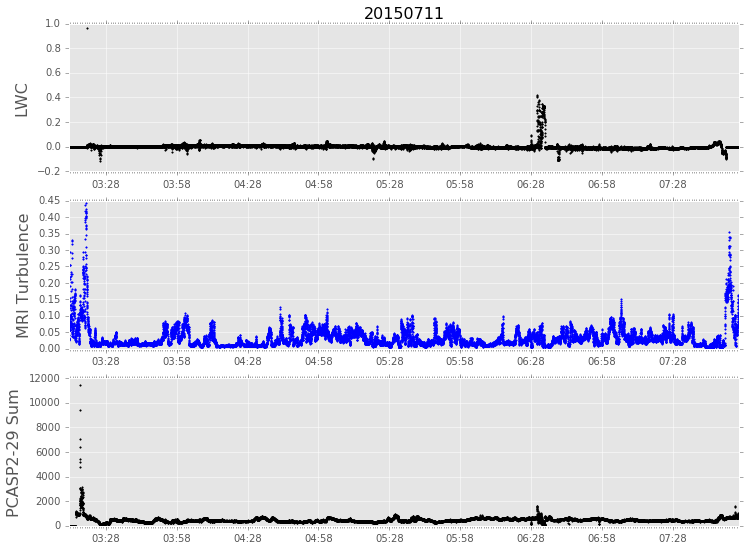

In [29]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
flp0711.plot_timeseries('lwc', color='k', marker='o', msize=1.5, lw=2,
                        date_format='%H:%M', tz=None, xdate=True,
#                    date_minor_string='minute', other_major_ticks=None, other_minor_ticks=None,
#                    other_min=None, other_max=None, 
#                    start_time=start_time, end_time=end_time,
                        title='20150711', ylab='LWC', ax=ax1)

flp0711.plot_timeseries('turb', color='b', ax=ax2, ylab=r"MRI Turbulence")
flp0711.plot_timeseries('pcasp2_29sum', color='k', ax=ax3, ylab="PCASP2-29 Sum")
#flp0711.overplot_timeseries('rstb1985', color='r', ax=ax5)
#ax5.legend(["KT-15.85", "KT-19.85"], numpoints=1, markerscale=2, frameon=False, fontsize='medium', loc="upper left")


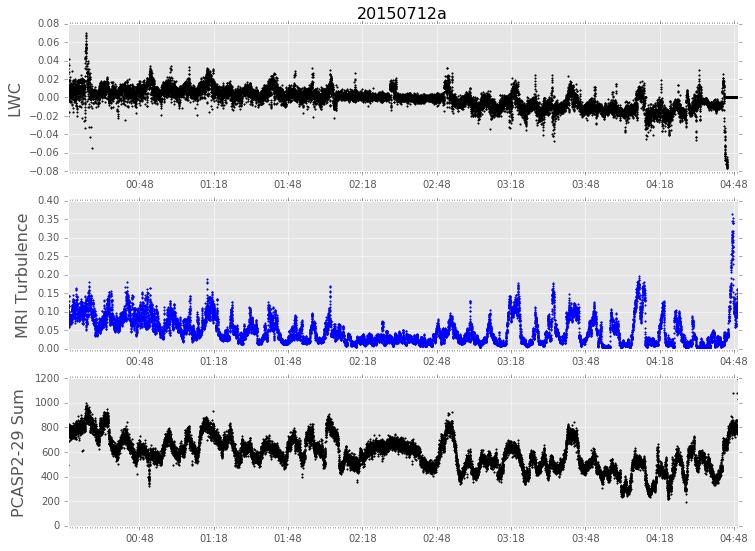

In [30]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
flp0712a.plot_timeseries('lwc', color='k', marker='o', msize=1.5, lw=2,
                        date_format='%H:%M', tz=None, xdate=True,
#                    date_minor_string='minute', other_major_ticks=None, other_minor_ticks=None,
#                    other_min=None, other_max=None, 
#                    start_time=start_time, end_time=end_time,
                        title='20150712a', ylab='LWC', ax=ax1)

flp0712a.plot_timeseries('turb', color='b', ax=ax2, ylab=r"MRI Turbulence")
flp0712a.plot_timeseries('pcasp2_29sum', color='k', ax=ax3, ylab="PCASP2-29 Sum")

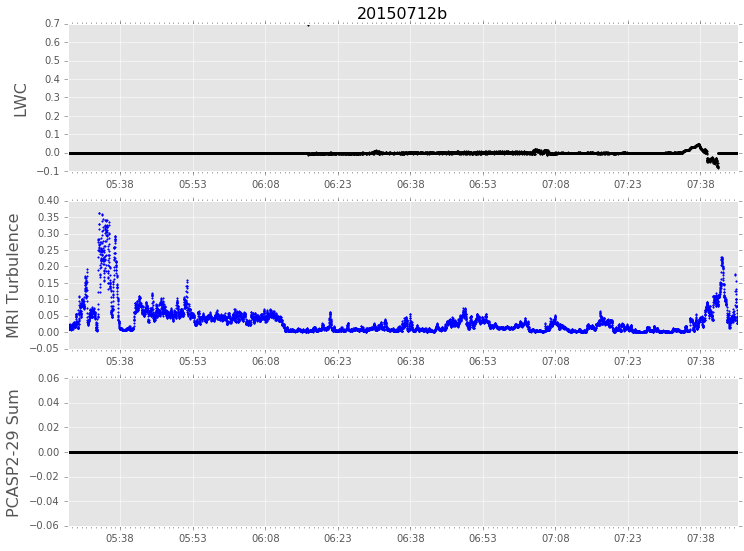

In [31]:
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9))
flp0712b.plot_timeseries('lwc', color='k', marker='o', msize=1.5, lw=2,
                        date_format='%H:%M', tz=None, xdate=True,
#                    date_minor_string='minute', other_major_ticks=None, other_minor_ticks=None,
#                    other_min=None, other_max=None, 
#                    start_time=start_time, end_time=end_time,
                        title='20150712b', ylab='LWC', ax=ax1)
flp0712b.plot_timeseries('turb', color='b', ax=ax2, ylab=r"MRI Turbulence")
flp0712b.plot_timeseries('pcasp2_29sum', color='k', ax=ax3, ylab="PCASP2-29 Sum")